In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_aisles = pd.read_csv('/content/drive/MyDrive/archive (5)/aisles.csv')
df_departments = pd.read_csv('/content/drive/MyDrive/archive (5)/departments.csv')
df_orders = pd.read_csv('/content/drive/MyDrive/archive (5)/orders.csv')
df_products = pd.read_csv('/content/drive/MyDrive/archive (5)/products.csv')

In [3]:
print(df_aisles.info())
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
print(df_departments.info())
df_departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
print(df_orders.info())
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
df_orders['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [7]:
print(df_products.info())
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
order_products_train = pd.read_csv('/content/drive/MyDrive/archive (5)/order_products__train.csv')
order_products_prior = pd.read_csv('/content/drive/MyDrive/archive (5)/order_products__prior.csv')

In [9]:
print(order_products_train.info())
order_products_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB
None


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
print(order_products_prior.info())
order_products_prior.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB
None


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
df_items = pd.merge(df_aisles,df_products,how='inner',on='aisle_id')
df_items.head()

,aisle_id,aisle,product_id,product_name,department_id
0,1,prepared soups salads,209,Italian Pasta Salad,20
1,1,prepared soups salads,554,Turkey Chili,20
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,20
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,20
4,1,prepared soups salads,2539,Original Potato Salad,20


In [12]:
df_items = pd.merge(df_items, df_departments, how='inner', on='department_id')
df_items.head() # aisle, department, product 정보가 모두 담긴 items table

,aisle_id,aisle,product_id,product_name,department_id,department
0,1,prepared soups salads,209,Italian Pasta Salad,20,deli
1,1,prepared soups salads,554,Turkey Chili,20,deli
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,20,deli
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,20,deli
4,1,prepared soups salads,2539,Original Potato Salad,20,deli


In [13]:
order_items = pd.merge(order_products_train, df_items, how='inner', on='product_id')
order_items # 주문내역의 상품명 확인

,order_id,product_id,add_to_cart_order,reordered,aisle_id,aisle,product_name,department_id,department
0,1,49302,1,1,120,yogurt,Bulgarian Yogurt,16,dairy eggs
1,816049,49302,7,1,120,yogurt,Bulgarian Yogurt,16,dairy eggs
2,1242203,49302,1,1,120,yogurt,Bulgarian Yogurt,16,dairy eggs
3,1383349,49302,11,1,120,yogurt,Bulgarian Yogurt,16,dairy eggs
4,1787378,49302,8,0,120,yogurt,Bulgarian Yogurt,16,dairy eggs
...,...,...,...,...,...,...,...,...,...
1384612,3420011,1528,12,0,97,baking supplies decor,Sprinkles Decors,13,pantry
1384613,3420084,47935,20,0,73,facial care,Classic Original Lip Balm SPF 12,11,personal care
1384614,3420084,9491,21,0,25,soap,Goats Milk & Chai Soap,11,personal care
1384615,3420088,16380,12,0,97,baking supplies decor,Stevia Sweetener,13,pantry


In [14]:
# order_id로 정렬
order_items = order_items.sort_values(by='order_id', ignore_index=True)
order_items

,order_id,product_id,add_to_cart_order,reordered,aisle_id,aisle,product_name,department_id,department
0,1,49302,1,1,120,yogurt,Bulgarian Yogurt,16,dairy eggs
1,1,43633,5,1,95,canned meat seafood,Lightly Smoked Sardines in Olive Oil,15,canned goods
2,1,13176,6,0,24,fresh fruits,Bag of Organic Bananas,4,produce
3,1,47209,7,0,24,fresh fruits,Organic Hass Avocado,4,produce
4,1,22035,8,1,21,packaged cheese,Organic Whole String Cheese,16,dairy eggs
...,...,...,...,...,...,...,...,...,...
1384612,3421063,35548,4,1,13,prepared meals,Twice Baked Potatoes,20,deli
1384613,3421063,14233,3,1,115,water seltzer sparkling water,Natural Artesian Water,7,beverages
1384614,3421070,4724,3,1,32,packaged produce,Broccoli Florettes,4,produce
1384615,3421070,16953,2,1,88,spreads,Creamy Peanut Butter,13,pantry


In [15]:
# 결측치 확인
order_items.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
aisle_id             0
aisle                0
product_name         0
department_id        0
department           0
dtype: int64

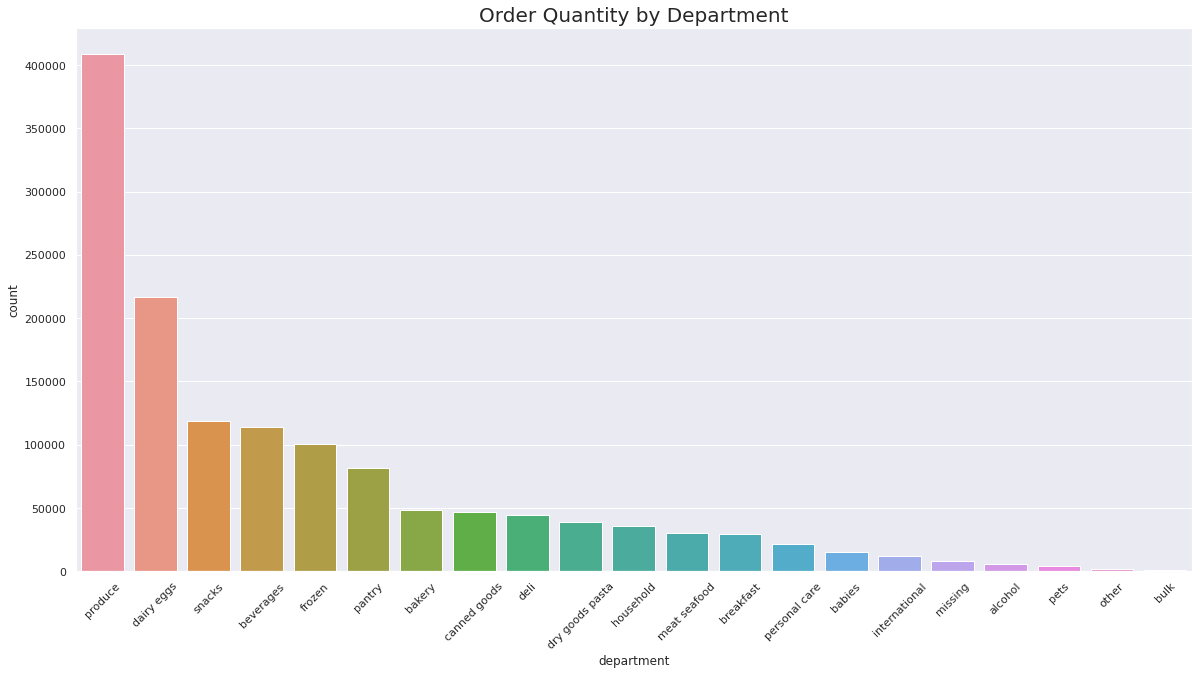

In [16]:
# department별 주문량 확인
sns.set(rc = {'figure.figsize':(20,10)})
sns.countplot(x='department', data=order_items, order = order_items['department'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Order Quantity by Department", size=20)
plt.show()

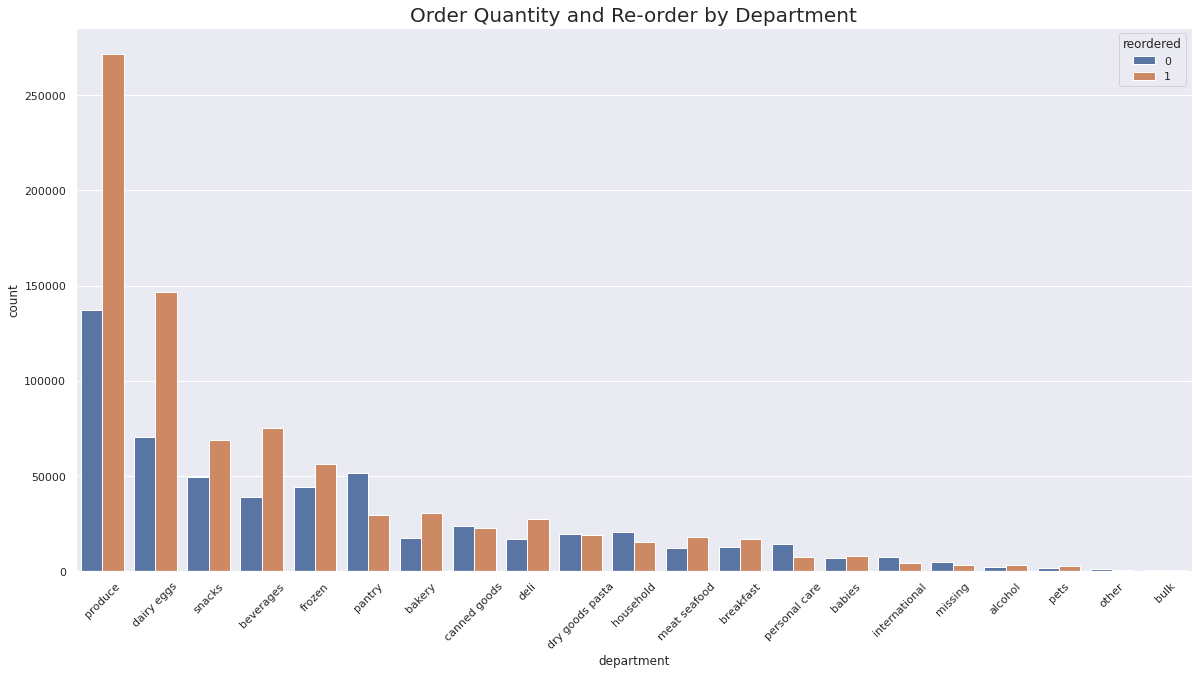

In [42]:
# department별 주문량, 재구매율 확인
sns.set(rc = {'figure.figsize':(20,10)})
sns.countplot(x='department', data=order_items, order = order_items['department'].value_counts().index, hue='reordered')
plt.xticks(rotation=45)
plt.title("Order Quantity and Re-order by Department", size=20)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

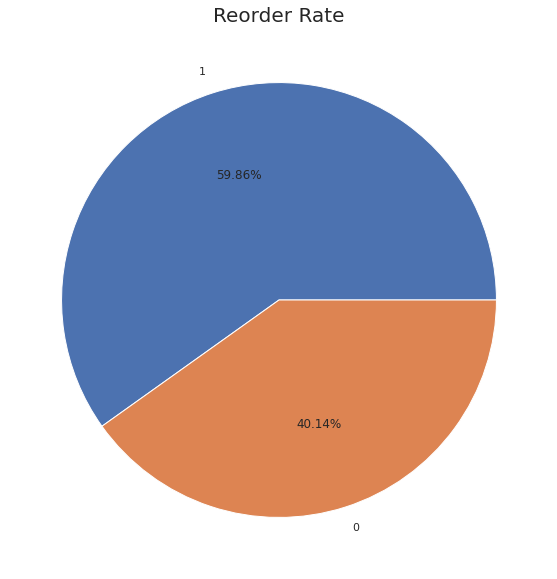

In [18]:
# 재주문율
reorder_size = order_items['reordered'].value_counts()
labels = [1,0]
plt.pie(reorder_size, autopct=lambda p : '{:.2f}%'.format(p), labels=labels)
plt.title("Reorder Rate", size=20)
plt.show

In [43]:
# 알아보면 좋을 것들
# 1. department별 재구매가 높은 항목
# 2. 가장 구매가 많이 이루어지는 시간대 v
# 3. 구매량 상위 5개 department 중 구매량 상위 5개 aisle v
# 4. days_since_prior_order를 통해 자주 구매하게 되는 품목이 무엇인지 확인(어떤 품목을 구매하는 고객이 재주문 기간이 짧은지?)
# 5. 재구매 빈도가 가장 많은 상위 고객 10명
# 6. add_to_cart_order를 통해 무엇을 가\
]장 카트에 먼저 담는지 확인 (무엇 때문에 인스타카트에 접속하는가?)
# 7. department별로 groupby, 재주문율 구하기...

SyntaxError: ignored

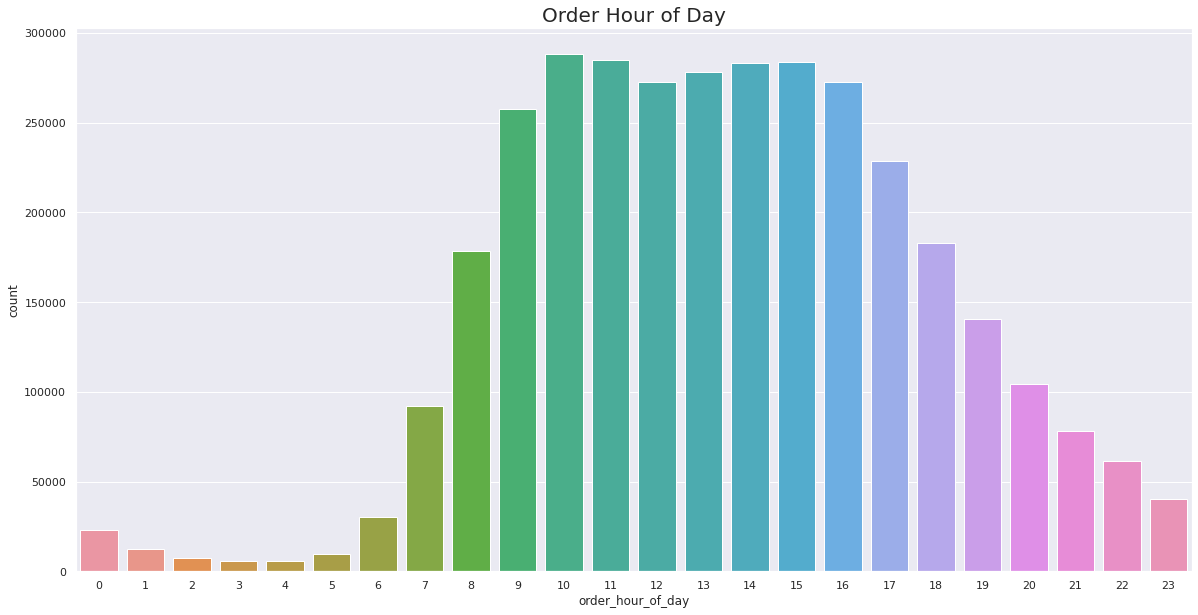

In [44]:
# 가장 구매가 많이 이루어지는 시간대 확인
sns.set(rc = {'figure.figsize':(20,10)})
sns.countplot(x='order_hour_of_day', data=df_orders)
plt.title("Order Hour of Day", size=20)
plt.show() # 새벽 3시 전후 가장 구매 적고 10~15시 사이 구매 활발

In [45]:
# user_id별 groupby
users = df_orders.groupby('user_id')
users.size()

user_id
1         11
2         15
3         13
4          6
5          5
          ..
206205     4
206206    68
206207    17
206208    50
206209    14
Length: 206209, dtype: int64

In [46]:
# 재구매 빈도가 가장 많은 상위 고객 10명
users.size().sort_values(ascending=False).head(10)

user_id
152340    100
185641    100
185524    100
81678     100
70922     100
136870    100
81704     100
119932    100
119835    100
91035     100
dtype: int64

In [47]:
# 구매량 상위 5개 department(produce, dairy eggs, snacks, beverages, frozen) 중 구매량 상위 5개 aisle

# produce department의 상위 5개 aisle
is_produce = order_items['department'] == 'produce'
produce = order_items[is_produce]
produce_top5 = produce.groupby(['aisle']).size().sort_values(ascending=False).head()
produce_top5

aisle
fresh vegetables              150609
fresh fruits                  150473
packaged vegetables fruits     78493
fresh herbs                    16052
packaged produce               13460
dtype: int64

In [48]:
# dairy eggs department의 상위 5개 aisle
is_dairyeggs = order_items['department'] == 'dairy eggs'
dairyeggs = order_items[is_dairyeggs]
dairyeggs_top5 = dairyeggs.groupby(['aisle']).size().sort_values(ascending=False).head()
dairyeggs_top5

aisle
yogurt             55240
packaged cheese    41699
milk               32644
soy lactosefree    26240
eggs               19875
dtype: int64

In [49]:
# snacks department의 상위 5개 aisle
is_snacks = order_items['department'] == 'snacks'
snacks = order_items[is_snacks]
snacks_top5 = snacks.groupby(['aisle']).size().sort_values(ascending=False).head()
snacks_top5

aisle
chips pretzels            31269
crackers                  19592
energy granola bars       17449
nuts seeds dried fruit    12532
candy chocolate           11453
dtype: int64

In [50]:
# beverages department의 상위 5개 aisle
is_beverages = order_items['department'] == 'beverages'
beverages = order_items[is_beverages]
beverages_top5 = beverages.groupby(['aisle']).size().sort_values(ascending=False).head()
beverages_top5

aisle
water seltzer sparkling water    36617
refrigerated                     23228
soft drinks                      16279
juice nectars                    14350
tea                               9376
dtype: int64

In [51]:
# frozen department의 상위 5개 aisle
is_frozen = order_items['department'] == 'frozen'
frozen = order_items[is_frozen]
frozen_top5 = frozen.groupby(['aisle']).size().sort_values(ascending=False).head()
frozen_top5

aisle
ice cream ice              22676
frozen produce             22453
frozen meals               18221
frozen breakfast            9729
frozen appetizers sides     8870
dtype: int64

In [52]:
produce_top5 = produce_top5.rename('count').to_frame()
produce_top5['department'] = 'produce'
dairyeggs_top5 = dairyeggs_top5.rename('count').to_frame()
dairyeggs_top5['department'] = 'dairy eggs'
snacks_top5 = snacks_top5.rename('count').to_frame()
snacks_top5['department'] = 'snacks'
beverages_top5 = beverages_top5.rename('count').to_frame()
beverages_top5['department'] = 'beverages'
frozen_top5 = frozen_top5.rename('count').to_frame()
frozen_top5['department'] = 'frozen'
top5 = produce_top5.append([dairyeggs_top5,snacks_top5,beverages_top5,frozen_top5])

In [53]:
top10 = top5.sort_values('count', ascending=False).reset_index().head(10)
top10

,aisle,count,department
0,fresh vegetables,150609,produce
1,fresh fruits,150473,produce
2,packaged vegetables fruits,78493,produce
3,yogurt,55240,dairy eggs
4,packaged cheese,41699,dairy eggs
5,water seltzer sparkling water,36617,beverages
6,milk,32644,dairy eggs
7,chips pretzels,31269,snacks
8,soy lactosefree,26240,dairy eggs
9,refrigerated,23228,beverages


Text(0.5, 1.0, 'Top 10 of Purchase Volume by Aisle')

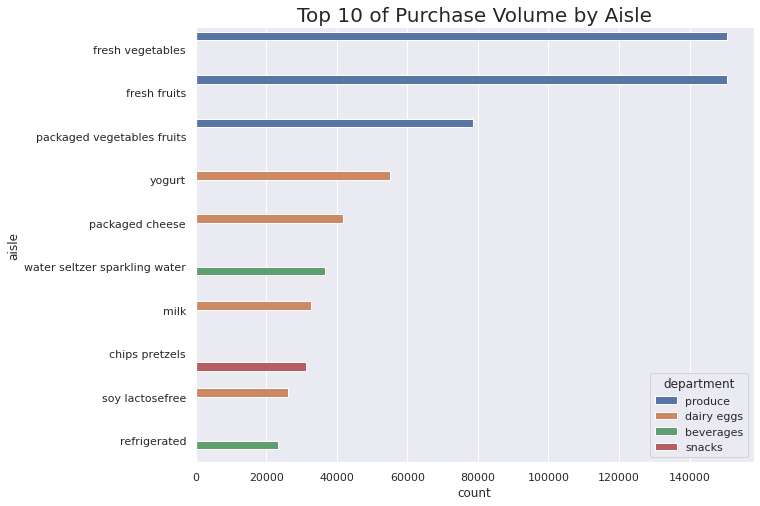

In [54]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(y='aisle', x='count', data=top10, hue='department')
plt.title("Top 10 of Purchase Volume by Aisle", size=20)